### 매출 시각화2
1. 최대 매출 상품 3종류 집계
1. 주문 연도에 따른 해당 상품의 매출 증감 분석

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# -' 깨짐 해결'
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
import seaborn as sns
from scipy import stats
# 한글 깨짐 해결
plt.rc('font', family='Malgun Gothic')

1. 최대 매출 상품 3종류 집계

In [2]:
df = pd.read_excel("미니프로젝트-쇼핑몰 실습데이터.xlsx")

In [3]:
df.head()

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN


In [48]:
# df2: 처리상태 = 구매확정 데이터, 구매확정은 교환, 환불이 안된다고 가정
df2 = df[df['처리상태'] == '구매확정']

In [49]:
# 상품명 칼럼에서 결측치 제거
# 상품 종류가 너무 많으므로 나머지는 분석을 진행하면서 전처리 실시
df2.dropna(subset=['상품명'], inplace=True)

C:\Users\leah5\AppData\Local\Temp\ipykernel_12320\133083514.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset=['상품명'], inplace=True)


In [44]:
df2['상품명'].isna().sum()

0

In [45]:
# 판매금액에 따른 상품명 알아보기
a = df2.groupby('상품명')

In [46]:
a.sum().sort_values(by='판매금액', ascending=False)

C:\Users\leah5\AppData\Local\Temp\ipykernel_12320\1857184311.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  a.sum().sort_values(by='판매금액', ascending=False)


,주문번호,주문수량,판매금액
상품명,,,
[신세계] 신세계 상품권-4만원권,394634624151914615,17758,681907200
[지사전용] 스마트 HBE-학습 전용 태블릿-후불,143507175424292587,1450,574200000
[스마트 HBE] 학습 전용 태블릿-일반결제,136840165579455392,1196,473616000
[스마트 HBE] 학습 전용 태블릿-정기결제,92494844162658298,1148,454608000
[지사전용] 스마트 HBM-학습 전용 태블릿-후불,122987382541638402,1080,427680000
...,...,...,...
[사무용품] 화신 캇타날(소),200820111746184,1,240
[운영비특가] 모나미-형광펜 에딩슈퍼600-색상선택,211123095458563,1,200
[신학기 사무용품 특가] 트룹런던 제본용 스테플(10호침),210318152512587,1,190


2. 주문 연도에 따른 해당 상품의 매출 증감 분석

In [55]:
# 여러개의 조건을 마스킹하는 법
df3 = df2[[i in ['[신세계] 신세계 상품권-4만원권','[지사전용] 스마트 HBE-학습 전용 태블릿-후불','[스마트 HBE] 학습 전용 태블릿-일반결제']
          for i in df2['상품명']]]

In [56]:
df3['상품명'].unique()

array(['[신세계] 신세계 상품권-4만원권', '[스마트 HBE] 학습 전용 태블릿-일반결제',
       '[지사전용] 스마트 HBE-학습 전용 태블릿-후불'], dtype=object)

In [58]:
# 연도별 분류
df3['연도'] = df3['주문일자'].dt.strftime('%Y')

C:\Users\leah5\AppData\Local\Temp\ipykernel_12320\3379427526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['연도'] = df3['주문일자'].dt.strftime('%Y')


In [68]:
df3.head()

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,연도
27922,201103155752352,다우기술,[신세계] 신세계 상품권-4만원권,신세계,1,38400,신용카드,2020-11-03 15:57:28,구매확정,N,NaN,NaN,2020
29088,201109152747195,다우기술,[신세계] 신세계 상품권-4만원권,신세계,1,38400,신 + 적,2020-11-09 15:27:22,구매확정,N,NaN,NaN,2020
29562,201113093039249,다우기술,[신세계] 신세계 상품권-4만원권,신세계,1,38400,신 + 적,2020-11-13 09:30:13,구매확정,N,NaN,NaN,2020
29833,201116224140602,다우기술,[신세계] 신세계 상품권-4만원권,신세계,15,576000,신 + 적,2020-11-16 22:41:14,구매확정,N,NaN,NaN,2020
30233,201119213407565,다우기술,[신세계] 신세계 상품권-4만원권,신세계,5,192000,신용카드,2020-11-19 21:33:40,구매확정,N,NaN,NaN,2020


<Axes: xlabel='연도', ylabel='판매금액'>

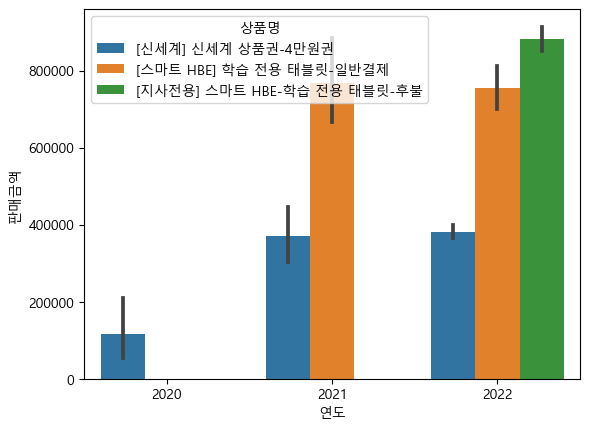

In [63]:
sns.barplot(data=df3, x='연도', y='판매금액', hue='상품명')

### 연관성 분석
1. 주문한 달과 판매금액의 상관관계 분석

In [71]:
df2.head()

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN


In [72]:
# 연도별 분류
df2['월별'] = df2['주문일자'].dt.strftime('%m')

C:\Users\leah5\AppData\Local\Temp\ipykernel_12320\3969925964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['월별'] = df2['주문일자'].dt.strftime('%m')


In [74]:
# 주문한 달과 결제금액의 연관성 분석 (카이제곱검정 실시)
# df_cor = 주문한 달과 판매금액 변수만 있는 데이터프레임
df_cor = df2[['월별', '판매금액']]

In [75]:
df_cor

,월별,판매금액
0,12,5000
1,12,5000
2,12,67500
3,12,30000
4,12,750
...,...,...
217852,11,19200
217914,11,2550
217927,11,1800
217938,11,3400


In [76]:
stats.spearmanr(df_cor['월별'],df_cor['판매금액'])
# p < 0.05 이므로 귀무가설 기각
# 두 변수 사이에 연관성이 있다.

SignificanceResult(statistic=-0.017409669209219616, pvalue=3.718235116022454e-12)

<Axes: xlabel='월별', ylabel='판매금액'>

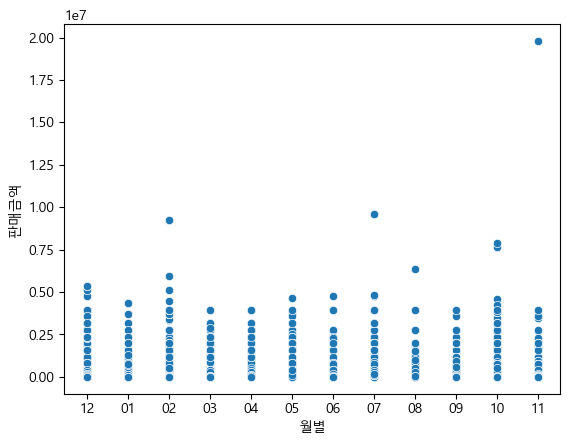

In [77]:
sns.scatterplot(x=df_cor['월별'],y=df_cor['판매금액'])